In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

#loading in the file
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [2]:
# check to see if the file loaded 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data wrangle and cleaning
First thing I notice is that there are some typos in the column names that need updating.  Looking at the means from the describe function, we notice that the "Age" column has a minimum value of -1, which will need to be removed.  Also the "PatientId" and "AppointmentID" do not seem to be important in our analysis, thus, we will remove them.  Lastly, I'd like to change the date format into datetime. 

### a) Renaming columns

In [4]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'Neighbourhood': 'Neighborhood'}, inplace=True)

#check to see if the changes took hold
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

### b) Dropping columns

In [5]:
df.drop(labels=(['PatientId', 'AppointmentID']), axis=1, inplace=True)

#check 
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighborhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show'],
      dtype='object')

### c) Dropping the minimum value in Age column

In [6]:
df = df[(df['Age'] >= 0)]

#check
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

### d) Checking for error values/NaNs

In [7]:
print('Age:', sorted(df['Age'].unique()))
print('Gender:', df['Gender'].unique())
print('Hypertension:', df['Hypertension'].unique())
print('Alcoholism:', df['Alcoholism'].unique())
print('Handicap:', df['Handicap'].unique())
print('Scholarship:', df['Scholarship'].unique())
print('SMS_received:', df['SMS_received'].unique())
print('No-show:', df['No-show'].unique())
#print('Appointment Date:', df['AppointmentDay'].unique())
print('Scheduled Day:', df['ScheduledDay'].unique())

Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Hypertension: [1 0]
Alcoholism: [0 1]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No-show: ['No' 'Yes']
Scheduled Day: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']


### e) Datetime conversion

In [8]:
appointmentDay = pd.to_datetime(df.AppointmentDay).dt.date
scheduledDay = pd.to_datetime(df.ScheduledDay).dt.date

In [9]:
# creating a window between appointment and scheduled days
df['wait_days'] = (appointmentDay - scheduledDay).dt.days
df['wait_days'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

In [10]:
#we can see that the minium values contain negative values, thus, we will remove them
df = df[(df['wait_days'] >= 0)]

#check
df['wait_days'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

In [11]:
# creating a weekday column
df['Weekday'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())

#check
print('Weekday:', sorted(df['Weekday'].unique()))

Weekday: [1, 2, 3, 4, 5, 6]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110521 non-null object
ScheduledDay      110521 non-null object
AppointmentDay    110521 non-null object
Age               110521 non-null int64
Neighborhood      110521 non-null object
Scholarship       110521 non-null int64
Hypertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handicap          110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null object
wait_days         110521 non-null int64
Weekday           110521 non-null int64
dtypes: int64(9), object(5)
memory usage: 12.6+ MB


## Overall No-show and gender analysis

In [13]:
# I want to the values describing the No-Show column as I find it a tad confusing. No-show = 0
#df['No-show'] = df['No-show'].replace({'No':1, 'Yes':0},inplace = True)
df['No-show']=df['No-show'].str.replace('No' , 'Attend')
df['No-show']=df['No-show'].str.replace('Yes' , 'Noshow')


#check
df['No-show'].unique()

array(['Attend', 'Noshow'], dtype=object)

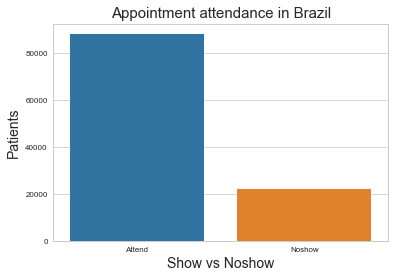

Attend    88207
Noshow    22314
Name: No-show, dtype: int64

In [14]:
#simple countplot showing Attendance vs No-show
sns.set_style('whitegrid')
sns.set_context('paper')
sns.countplot(x = 'No-show', data = df)
plt.title('Appointment attendance in Brazil', fontsize=15)
plt.xlabel('Show vs Noshow', fontsize =14)
plt.ylabel('Patients', fontsize = 14)
plt.show()

df['No-show'].value_counts()

In [15]:
noshow = df['No-show'].value_counts()
percent_ns = noshow[1]/noshow.sum() * 100
print("The percentage of patients that do not attend appointments is {}%".format(round(percent_ns,3)))

The percentage of patients that do not attend appointments is 20.19%


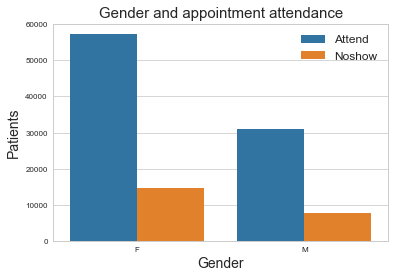

F    71836
M    38685
Name: Gender, dtype: int64

In [16]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.countplot(x = 'Gender', hue ='No-show', data = df)
plt.title('Gender and appointment attendance', fontsize=15)
plt.xlabel('Gender', fontsize =14)
plt.ylabel('Patients', fontsize = 14)
plt.legend(loc=1, fontsize=12)
plt.show()

df['Gender'].value_counts()

In [17]:
gender = df['Gender'].value_counts()
percent_male = gender[1]/gender.sum() * 100
percent_female = gender[0]/gender.sum() * 100
print("The percentage of patients that are male: {}%".format(round(percent_male,3)))
print("The percentage of patients that are female: {}%".format(round(percent_female,3)))

The percentage of patients that are male: 35.002%
The percentage of patients that are female: 64.998%


In [82]:
df.groupby(['No-show', 'Gender']).mean()

Age  Scholarship  Hypertension  Diabetes  Alcoholism  \
No-show Gender                                                               
Attend  F       39.591126     0.117862      0.221539  0.080164    0.015984   
        M       34.461372     0.049609      0.172696  0.062141    0.057102   
Noshow  F       36.161264     0.144336      0.182099  0.069701    0.021109   
        M       30.835168     0.061116      0.144374  0.053477    0.047779   

                Handicap  SMS_received  wait_days   Weekday  
No-show Gender                                               
Attend  F       0.019792      0.305389   9.093318  2.856075  
        M       0.028196      0.265358   8.128803  2.860022  
Noshow  F       0.018505      0.460558  16.030635  2.847440  
        M       0.023436      0.396737  15.466788  2.888126

###  Morbidity and No-show analysis

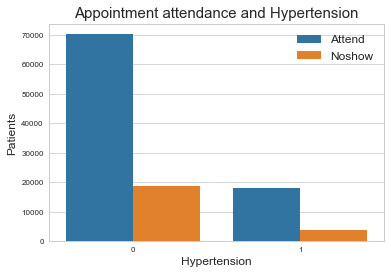

The percentage of patient that are: 19.726%
The percentage of patient that are not :80.274%


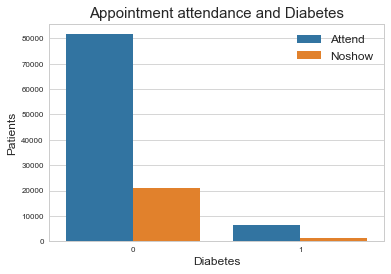

The percentage of patient that are: 7.187%
The percentage of patient that are not :92.813%


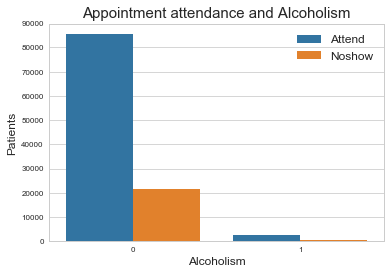

The percentage of patient that are: 3.04%
The percentage of patient that are not :96.96%


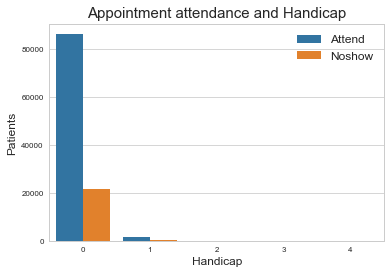

The percentage of patient that are: 1.846%
The percentage of patient that are not :97.974%


In [18]:
columns = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for col in columns:
    #plot
    sns.set_style('whitegrid')
    sns.set_context('paper')
    sns.countplot(x = col, hue = 'No-show' ,data = df)
    plt.title('Appointment attendance and ' +str(col), fontsize=15)
    plt.xlabel(str(col), fontsize=12)
    plt.ylabel('Patients', fontsize = 12)
    plt.legend(loc=1, fontsize=12)
    plt.show()
    #ratio
    col = df[col].value_counts()
    percent_a = col[1]/col.sum() *100
    percent_b = col[0]/col.sum() *100
    print("The percentage of patient that are: {}%".format(round(percent_a, 3)))
    print("The percentage of patient that are not :{}%".format(round(percent_b, 3)))

We can see from the plots that the proportion of those who show vs no-show their appointments is similar across all morbidities plotted with the exception of handicap. Being handicapped likely leads to a higher no-show rate due to the increased difficulty of getting around and attending appointments.  However, the sample size is very small and would be difficult to deduce as the sole reason for the total no-show population. Having hypertension seems to be the largest morbidity in this dataset as almost 20% are hypertensive.  

### Social systems and no-show analysis

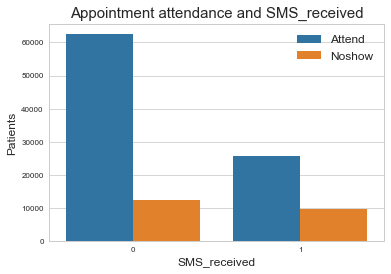

The percentage of patient that are: 32.104%
The percentage of patient that are not :67.896%


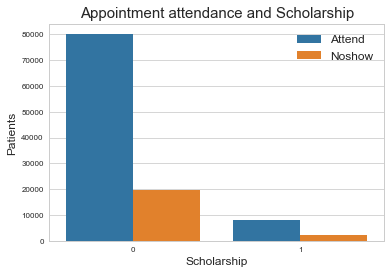

The percentage of patient that are: 9.827%
The percentage of patient that are not :90.173%


In [44]:
columns = ['SMS_received', 'Scholarship']
for col in columns:
    #plot
    sns.set_style('whitegrid')
    sns.set_context('paper')
    sns.countplot(x = col, hue = 'No-show' ,data = df)
    plt.title('Appointment attendance and ' +str(col), fontsize=15)
    plt.xlabel(str(col), fontsize=12)
    plt.ylabel('Patients', fontsize = 12)
    plt.legend(loc=1, fontsize=12)
    plt.show()
    #ratio
    col = df[col].value_counts()
    percent_a = col[1]/col.sum() *100
    percent_b = col[0]/col.sum() *100
    print("The percentage of patient that are: {}%".format(round(percent_a, 3)))
    print("The percentage of patient that are not :{}%".format(round(percent_b, 3)))

It seems that receiving an SMS notification has virtually no effect on preventing no-shows.  Additionally, having a scholarship (welfare) doesn't have an effect on no-shows.  However, its important to note that the population on welfare (almost 10%) is small relative to those that do not hold scholarship.

### Age and no-show analysis


In [48]:
def age_group(x):
    if x <= 3:
        return 'infant'
    elif x <=11:
        return 'child'
    elif x <= 18:
        return 'teen'
    elif x <= 26:
        return 'young adult'
    elif x <= 46:
        return 'adult'
    elif x <= 70:
        return 'middle aged'
    else:
        return 'elderly'

In [49]:
df['Age_group'] = df['Age'].apply(lambda x: age_group(x))

In [69]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighborhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show', 'wait_days', 'Weekday', 'Age_group'],
      dtype='object')

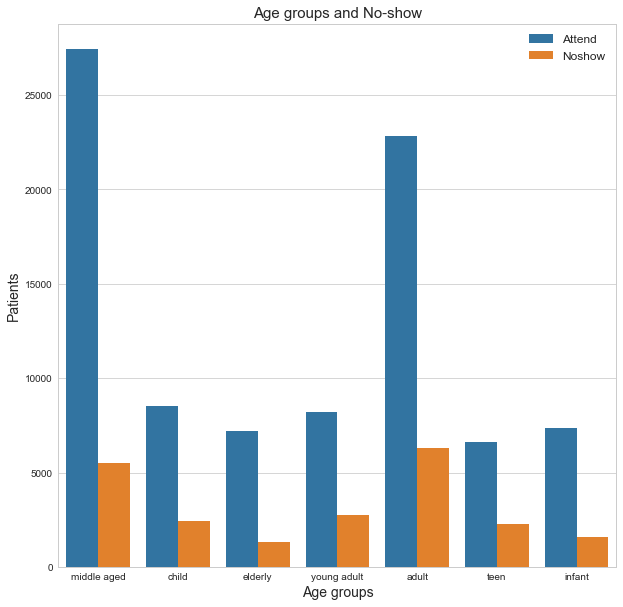

In [51]:
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(10, 10))
sns.countplot(x='Age_group', hue = 'No-show', data = df)
plt.title('Age groups and No-show', fontsize =15)
plt.xlabel('Age groups', fontsize =14)
plt.ylabel('Patients', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=10)
#plt.xlim(-1, 14)  #2 weeks
plt.legend(loc=1, fontsize=12)
plt.show()

We can see that the 2 largest age groups are adults and middle aged groups.  As expected, the ratios of no-shows seems stable across all groups.  Looking at the plot, when comparing the other younger groups, the elderly seem to have a better ratio of attending their appointments. 

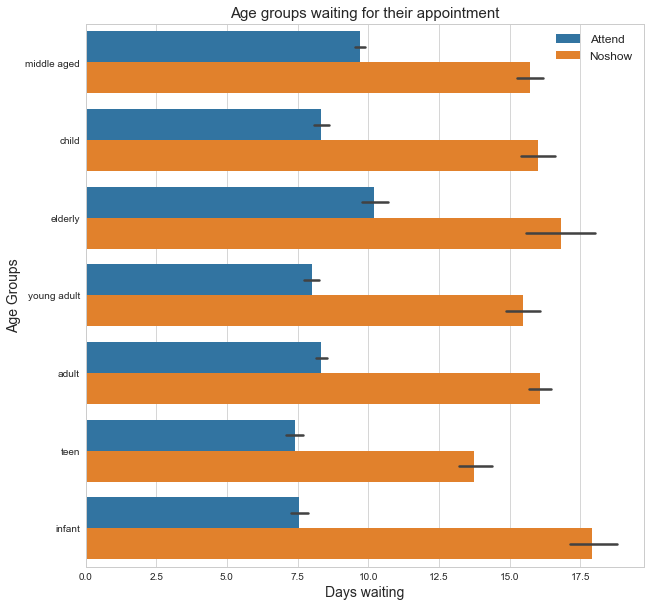

In [68]:
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(10, 10))
sns.barplot(x='wait_days', y='Age_group' ,hue = 'No-show', data = df)
plt.title('Age groups waiting for their appointment', fontsize =15)
plt.xlabel('Days waiting', fontsize =14)
plt.ylabel('Age Groups', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(loc=1, fontsize=12)
plt.show()

Here we can see a breakdown of age groups and their likelihood of missing their appointment after waiting a certain number of days. If the window between scheduled date and appointment date is larger than 7-10 days, its extremely likely that the patient will miss their appointment. 

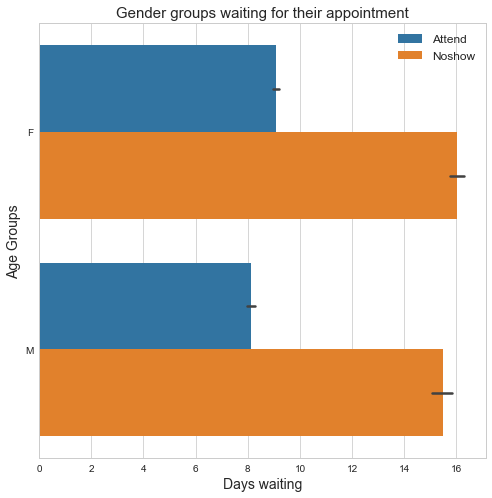

In [78]:
col = ['Gender']
for c in col:
    sns.set_style('whitegrid')
    sns.set_context('paper')
    plt.figure(figsize=(8, 8))
    sns.barplot(x='wait_days', y=c ,hue = 'No-show', data = df)
    plt.title('Gender groups waiting for their appointment', fontsize =15)
    plt.xlabel('Days waiting', fontsize =14)
    plt.ylabel('Age Groups', fontsize = 14)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend(loc=1, fontsize=12)
    plt.show()

A similar observation can be seen when comparing gender groups.  It seem that after an 8 day period, the patient is very likely to miss the appointment

### Day of the week and no-show analysis

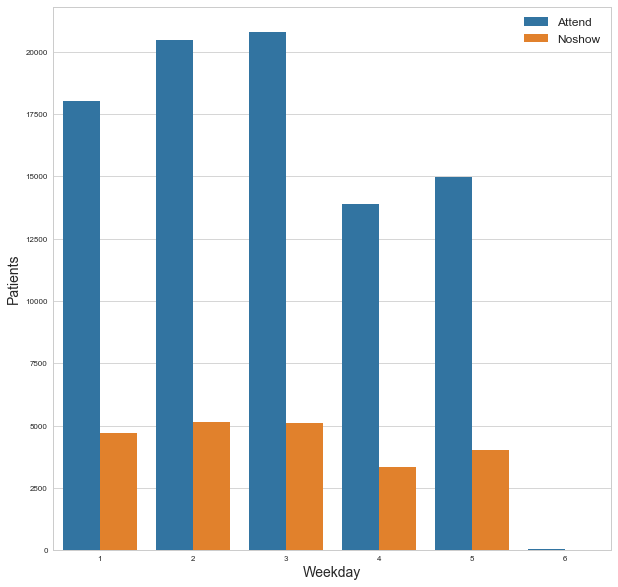

In [41]:
# weekday and attendance
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(10,10))
sns.countplot(x='Weekday', hue = 'No-show', data = df)
plt.xlabel('Weekday', fontsize =14)
plt.ylabel('Patients', fontsize = 14)
plt.legend(loc=1, fontsize=12)
plt.show()

During the week we can see that the ratio of attendance to no-shows is stable. 

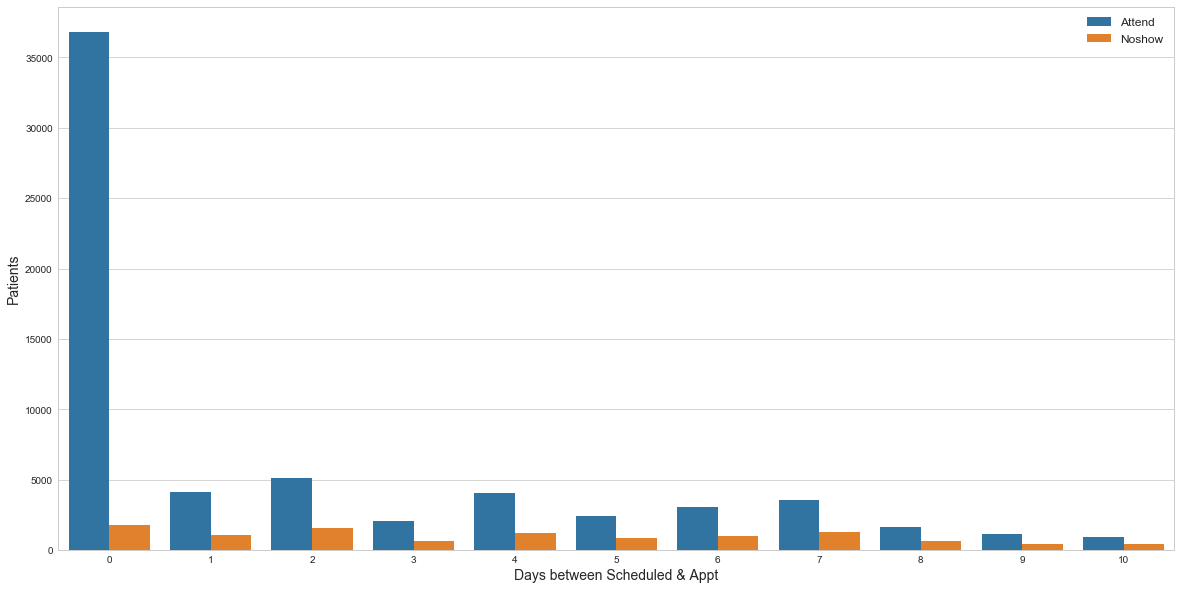

In [73]:
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(20,10))
sns.countplot(x='wait_days', hue = 'No-show', data = df)
plt.xlabel('Days between Scheduled & Appt', fontsize =14)
plt.ylabel('Patients', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlim(-0.5, 10.5)  #2 weeks
plt.legend(loc=1, fontsize=12)
plt.show()

Interestingly, the system seems to prefer an scheduling an appointment on the same day, unless most of these are just walk-ins are emergency visits.  This matches up with our previous plot where we saw that an 8 day window seemed to be the cut-off point as to whether the patient will miss an appointment.  

In [83]:
df.groupby(['No-show', 'Weekday']).mean()

Age  Scholarship  Hypertension  Diabetes  Alcoholism  \
No-show Weekday                                                               
Attend  1        37.466545     0.093486      0.199567  0.068964    0.030182   
        2        37.847813     0.094787      0.207390  0.077118    0.028016   
        3        37.872052     0.093867      0.201935  0.072591    0.031482   
        4        37.837443     0.094256      0.209001  0.071968    0.029981   
        5        37.914364     0.092911      0.204646  0.078494    0.032839   
        6        53.200000     0.100000      0.500000  0.166667    0.066667   
Noshow  1        34.371081     0.114097      0.169119  0.069951    0.034122   
        2        34.927767     0.120194      0.171262  0.057282    0.031845   
        3        33.699921     0.115279      0.166143  0.062058    0.026709   
        4        34.737788     0.103986      0.168115  0.060533    0.030267   
        5        33.864503     0.121377      0.169928  0.071092    0.028734   
        6        54.888889     0.000000      0.444444  0.222222    0.000000   

                 Handicap  SMS_received  wait_days  
No-show Weekday                                     
Attend  1        0.021249      0.288116   9.109410  
        2        0.022843      0.366361   8.645109  
        3        0.021084      0.310629   8.740156  
        4        0.024301      0.249551   8.199224  
        5        0.025230      0.204579   9.023628  
        6        0.033333      0.333333   3.966667  
Noshow  1        0.020047      0.416080  17.490723  
        2        0.022718      0.563495  15.496893  
        3        0.020228      0.472702  14.967989  
        4        0.021277      0.412346  15.542703  
        5        0.016349      0.283626  15.704979  
        6        0.000000      0.333333   5.111111

## Conclusion
After cleaning the data and making a few changes, we explored the overall trends using descriptive stats.  Then made countplots utilizing seaborn.  When trying to compare 3 variables, we used seaborn barplot.  Overall, we didn't find any  significant reason for people missing their appointments, other than if they scheduled it over 8 days in advance.  We found a huge dropoff in attending appointments after the 8 day window. 